## Conjunto de datos: Partidos y Jugadores Europeos

### DescripciónVamos a utilizar una base de datos en formato SQLite3 que contiene datos de fútbol europeo. Esta base de datos incluye información sobre más de 25,000 partidos y más de 10,000 jugadores para las temporadas de fútbol desde 2008 hasta 2016. Este conjunto de datos puede ser utilizado de varias maneras en el ámbito del análisis de datos, como por ejemplo para clasificar jugadores según su desempeño, identificar tendencias en el rendimiento de equipos a lo largo de las temporadas, entre otros.

En este caso, nos enfocaremos en utilizar regresión lineal. La regresión lineal nos permitirá analizar las relaciones entre las variables en nuestros datos y predecir valores futuros. Por ejemplo, podríamos utilizar la regresión lineal para predecir el número de goles que un jugador marcará en una temporada en función de su edad, posición en el campo, historial de lesiones, entre otros factores. Esta técnica nos ayudará a obtener información valiosa sobre el rendimiento de los jugadores y equipos en el fútbol europeo durante el período de tiempo especificadorio.

###### 1. Importamos librerias

In [3]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import os

###### 2. Leer base de datos y ver los datos

In [4]:
# Especifica la ruta completa de tu base de datos SQLite
ruta_base_datos = "databases/database.sqlite"

# Conecta con la base de datos
cnx = sqlite3.connect(ruta_base_datos)

# Lee los datos de la tabla "Player_Attributes" en un DataFrame de pandas
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
df.shape

(183978, 42)

In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

###### 3. Determinar el o los "FEATURES o X" para alimentar el modelo

In [8]:
df['overall_rating'].head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

Vamos a usar el "overall_rating" como nuestra variable objetivo porque proporciona una medida general del rendimiento de un jugador en el campo. Es una métrica consolidada y ampliamente aceptada en el mundo del fútbol para evaluar la habilidad y calidad de un jugador. Al enfocarnos en predecir el "overall_rating", podemos crear un modelo que tenga en cuenta múltiples aspectos del juego, como la técnica, la táctica y la capacidad física, para obtener una visión general del desempeño de un jugador en conjunto. Esto nos permitirá hacer predicciones sobre el rendimiento general de los jugadores con una sola variable objetivo.
Sin embargo, también podríamos considerar otras características específicas del juego, como "finishing", "heading_accuracy", "marking", "interceptions", entre otras, dependiendo de nuestros objetivos de análisis.

**<font color="#00FF00">Vamos a descubrir el target/Y, es decir la variable dependiente de este modelo.</font>**



In [9]:
#Elegimos los features las cuales seran estas características que representan una variedad de habilidades y atributos importantes en el fútbol
#como la técnica, la precisión en el pase, la capacidad de disparo, la velocidad y la resistencia física. 
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

**<font color="#FF0000">Seleccionamos el Target que en este caso es overall_rating</font>**


In [10]:
target = ['overall_rating']

###### 4. Limpiamos los datos

In [11]:
df = df.dropna()

###### 5. Separamos las features en X y el target en Y

In [12]:
X = df[features]
y = df[target]

In [13]:
X.iloc[7]

potential             75.0
crossing              79.0
finishing             52.0
heading_accuracy      57.0
short_passing         70.0
volleys               29.0
dribbling             71.0
curve                 68.0
free_kick_accuracy    69.0
long_passing          68.0
ball_control          70.0
acceleration          79.0
sprint_speed          78.0
agility               78.0
reactions             67.0
balance               90.0
shot_power            71.0
jumping               84.0
stamina               79.0
strength              56.0
long_shots            59.0
aggression            67.0
interceptions         66.0
positioning           58.0
vision                65.0
penalties             59.0
marking               76.0
standing_tackle       75.0
sliding_tackle        78.0
gk_diving             14.0
gk_handling            7.0
gk_kicking             9.0
gk_positioning         9.0
gk_reflexes           12.0
Name: 7, dtype: float64

In [14]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


###### 6. Dibujamos los datos en un plot

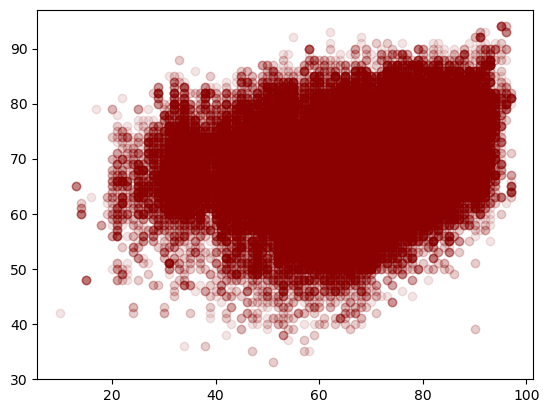

In [16]:
plt.scatter(X['acceleration'], y, color='darkred', label="Data", alpha=.1)

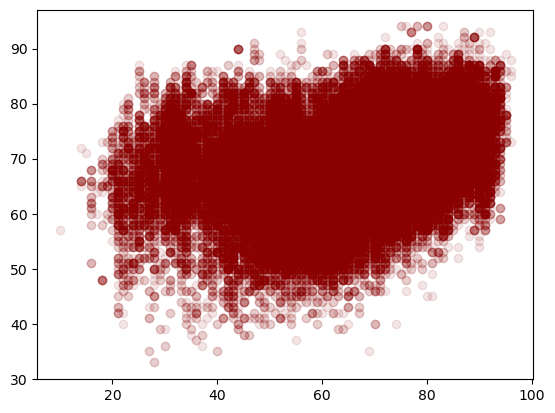

In [17]:
plt.scatter(X['stamina'], y, color='darkred', label="Data", alpha=.1)          

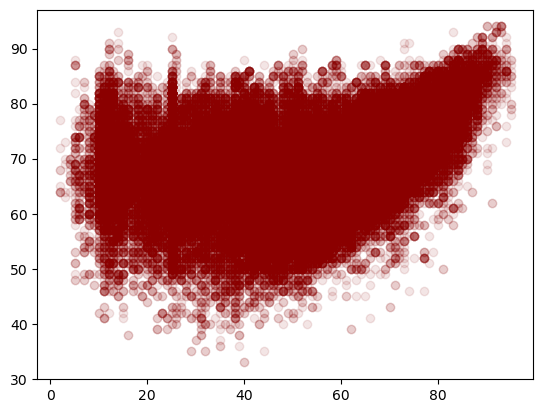

In [18]:
plt.scatter(X['positioning'], y, color='darkred', label="Data", alpha=.1)          

<font color="#FFD700"><i>Estos gráficos nos ayudan a explorar la relación, o la falta de ella, entre las características que estamos analizando y nuestro objetivo. En este caso, estamos buscando una línea de tendencia que muestre cómo mejora una cierta característica a medida que el jugador es de mayor calidad. En los gráficos de aceleración y stamina, podemos notar visualmente que estas características están relacionadas con el nivel del jugador. Por otro lado, observamos la característica de positioning, donde vemos que muchos jugadores de baja calidad tienen un buen posicionamiento, pero este número disminuye notablemente en jugadores de mayor calidad. Esto sugiere que el positioning puede no ser una variable útil para nuestro modelo y podría afectar negativamente el porcentaje de aciertos si se incluye en el análisis.</i></font>


###### 7. Separamos los datos en entrenamiento y en testeo

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=324)
#Esta línea divide los datos en conjuntos de entrenamiento y prueba para un modelo de aprendizaje automático. 
#Selecciona aleatoriamente un porcentaje del conjunto de datos para el conjunto de prueba y el resto para el conjunto de entrenamiento,
#establece la semilla para el generador de números aleatorios utilizado por el algoritmo de división

In [20]:
scale = preprocessing.StandardScaler()
#El escalador se ajusta a los datos de entrenamiento para calcular la media y la desviación estándar de cada característica.
scale.fit(X_train)
#Se transforman los datos de entrenamiento utilizando el escalador ajustado, lo que normaliza las características.
X_train = scale.transform(X_train)
#Es decir homogeniso el dataset y quito los sesgos

In [21]:
X_train

array([[ 1.44656849, -1.74342918, -1.30933816, ...,  2.57678815,
         3.78787044,  3.63878633],
       [ 0.53577993, -2.26453801, -2.09625392, ..., -0.30869586,
        -0.06421014, -0.25250618],
       [-0.67860483, -2.43824096, -1.99133182, ...,  1.67803083,
         2.60739414,  2.70952245],
       ...,
       [ 1.75016468,  1.32532283,  1.31371437, ..., -0.63981698,
        -0.31273146, -0.36866417],
       [ 0.08038564,  0.804214  , -0.5224224 , ..., -0.40330189,
        -0.62338312, -0.54290114],
       [ 1.44656849, -1.56972624,  0.52679861, ..., -0.54521094,
        -0.68551345, -0.25250618]])

###### 8. Se crea una instancia del modelo

In [22]:
regressor = LinearRegression()

###### 9. Se ajusta el modelo a los datos de entrenamiento

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

###### 10. Se hace una prediccion utilizando el dataset de testeo que se reservo

In [24]:
X_test = scale.transform(X_test)
y_prediction = regressor.predict(X_test)
y_result = y_prediction - y_test
y_prediction.shape

(59517, 1)

<font color="#800080"><i>Primero, se escalan los valores de prueba para garantizar que estén en la misma escala que los datos utilizados para entrenar el modelo, lo cual es crucial para una predicción precisa. Después de esto, se procede a realizar las predicciones utilizando los valores de prueba. Finalmente, para evaluar el rendimiento del modelo, se calcula la diferencia entre las predicciones y los valores reales, lo que proporciona una medida de cuánto se equivocó el modelo en cada predicción.</i></font>


Vamos a calcular la raíz cuadrada del error cuadrático medio (RMSE), que se calcula con la siguiente fórmula:
$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$} \]

Donde:
- \( n \) es el número de muestras en el conjunto de datos.
- \( y_i \) es el valor real de la muestra \( i \).
- \( \hat{y}_i \) es la predicción para la muestra \( i \).

El RMSE es una medida que representa la diferencia promedio entre las predicciones del modelo y los valores reales, proporcionando una evaluación de la precisión l modelo.
l modelo.


In [27]:
RMSE = sqrt(mean_squared_error(y_true= y_test, y_pred= y_prediction))
accuracy_percentage = regressor.score(X_test, y_test) * 100
print(f"El porcentaje de precisión es: {accuracy_percentage:.2f}%")

El porcentaje de precisión es: 84.13%


In [29]:
print(RMSE) #Se tiene error de casi 3% el cual no esta mal

2.8053030468552094


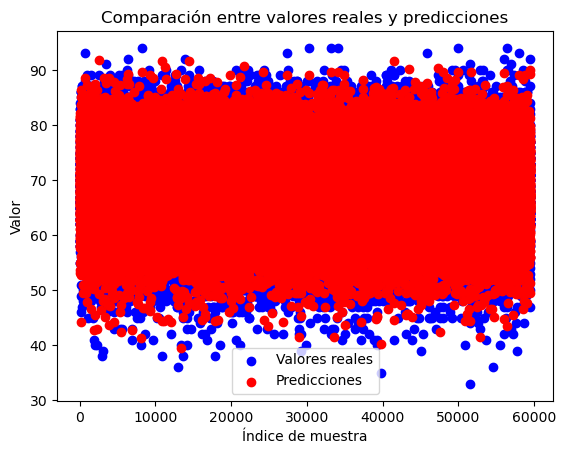

In [31]:
# Graficar los resultados de la predicción
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores reales')
plt.scatter(range(len(y_prediction)), y_prediction, color='red', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()
plt.show()

<h1 align="center"><font color="#FF0000">¿Se puede mejorar el modelo? Inténtalo...</font></h1>